In [37]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import numpy as np


from src.preprocess import create_flickr_dataframe, build_vocabulary, create_data_loader
from src.utils import get_transforms, show_image_with_captions
from src.modeling import ImageCaptioningModule, load_model_state, save_model_state
from src.training import setup_training, resume_training

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
images_path = 'Flick_30k_data/Images'
captions_path = 'Flick_30k_data/captions.txt'

In [3]:
df = create_flickr_dataframe(captions_path, images_path)

In [4]:
org_df = df.copy()

In [5]:
captions_vocab = build_vocabulary(df)

In [6]:
train_transform, val_transform = get_transforms()

In [7]:
org_train_df = df.sample(frac=0.9, random_state=42)
val_df = df.drop(org_train_df.index)

In [8]:
train_df = org_train_df.sample(frac=0.5, random_state=42)

In [9]:
# Create data loaders
train_loader = create_data_loader(
    df=train_df,
    vocab=captions_vocab,
    transform=train_transform,
    batch_size=32,
    num_workers=10
)

val_loader = create_data_loader(
    df=val_df,
    vocab=captions_vocab,
    transform=val_transform,
    batch_size=32,
    shuffle=False,
    num_workers=10
)

In [10]:
for images, captions, lengths in train_loader:
    print("Batch shapes:")
    print(f"Images: {images.shape}")
    print(f"Captions: {captions.shape}")
    print(f"Lengths: {lengths.shape}")
    break

Batch shapes:
Images: torch.Size([32, 3, 224, 224])
Captions: torch.Size([32, 50])
Lengths: torch.Size([32])



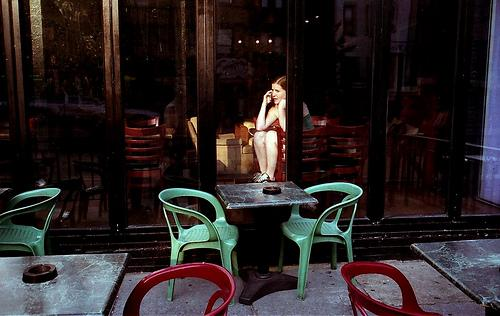

In [70]:
image_path= show_image_with_captions(df)

In [71]:
image_path

'Flick_30k_data/Images/314544433.jpg'

In [29]:
# Training with TensorBoard logging
model = ImageCaptioningModule(
    vocab=captions_vocab,
    embed_size=512,
    hidden_size=512,
    learning_rate=1e-4,
    teacher_forcing_ratio=0.9,
    finetune_encoder_after=20
)

# Setup and start training
trainer, checkpoint_callback = setup_training(max_epochs=20)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [25]:
trainer.fit(model, train_loader, val_loader)


  | Name              | Type             | Params
-------------------------------------------------------
0 | image_encoder     | Sequential       | 23.5 M
1 | image_projection  | Linear           | 1.0 M 
2 | caption_embedding | Embedding        | 4.0 M 
3 | decoder           | CaptionDecoder   | 10.0 M
4 | criterion         | CrossEntropyLoss | 0     
-------------------------------------------------------
11.1 M    Trainable params
23.5 M    Non-trainable params
34.6 M    Total params
138.355   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 3.921
Epoch 0, global step 2235: 'val_loss' reached 3.92096 (best 3.92096), saving model to 'checkpoints_v1/caption-model-epoch=00-val_loss=3.92.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.289 >= min_delta = 0.0. New best score: 3.632
Epoch 1, global step 4470: 'val_loss' reached 3.63226 (best 3.63226), saving model to 'checkpoints_v1/caption-model-epoch=01-val_loss=3.63.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.143 >= min_delta = 0.0. New best score: 3.489
Epoch 2, global step 6705: 'val_loss' reached 3.48910 (best 3.48910), saving model to 'checkpoints_v1/caption-model-epoch=02-val_loss=3.49.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.117 >= min_delta = 0.0. New best score: 3.372
Epoch 3, global step 8940: 'val_loss' reached 3.37245 (best 3.37245), saving model to 'checkpoints_v1/caption-model-epoch=03-val_loss=3.37.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.074 >= min_delta = 0.0. New best score: 3.298
Epoch 4, global step 11175: 'val_loss' reached 3.29843 (best 3.29843), saving model to 'checkpoints_v1/caption-model-epoch=04-val_loss=3.30.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.056 >= min_delta = 0.0. New best score: 3.243
Epoch 5, global step 13410: 'val_loss' reached 3.24283 (best 3.24283), saving model to 'checkpoints_v1/caption-model-epoch=05-val_loss=3.24.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.040 >= min_delta = 0.0. New best score: 3.203
Epoch 6, global step 15645: 'val_loss' reached 3.20321 (best 3.20321), saving model to 'checkpoints_v1/caption-model-epoch=06-val_loss=3.20.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.036 >= min_delta = 0.0. New best score: 3.168
Epoch 7, global step 17880: 'val_loss' reached 3.16751 (best 3.16751), saving model to 'checkpoints_v1/caption-model-epoch=07-val_loss=3.17.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.037 >= min_delta = 0.0. New best score: 3.130
Epoch 8, global step 20115: 'val_loss' reached 3.13017 (best 3.13017), saving model to 'checkpoints_v1/caption-model-epoch=08-val_loss=3.13.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.009 >= min_delta = 0.0. New best score: 3.121
Epoch 9, global step 22350: 'val_loss' reached 3.12093 (best 3.12093), saving model to 'checkpoints_v1/caption-model-epoch=09-val_loss=3.12.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.036 >= min_delta = 0.0. New best score: 3.085
Epoch 10, global step 24585: 'val_loss' reached 3.08485 (best 3.08485), saving model to 'checkpoints_v1/caption-model-epoch=10-val_loss=3.08.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.010 >= min_delta = 0.0. New best score: 3.074
Epoch 11, global step 26820: 'val_loss' reached 3.07437 (best 3.07437), saving model to 'checkpoints_v1/caption-model-epoch=11-val_loss=3.07.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 12, global step 29055: 'val_loss' reached 3.07852 (best 3.07437), saving model to 'checkpoints_v1/caption-model-epoch=12-val_loss=3.08.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.013 >= min_delta = 0.0. New best score: 3.061
Epoch 13, global step 31290: 'val_loss' reached 3.06118 (best 3.06118), saving model to 'checkpoints_v1/caption-model-epoch=13-val_loss=3.06.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.009 >= min_delta = 0.0. New best score: 3.052
Epoch 14, global step 33525: 'val_loss' reached 3.05215 (best 3.05215), saving model to 'checkpoints_v1/caption-model-epoch=14-val_loss=3.05.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 3.049
Epoch 15, global step 35760: 'val_loss' reached 3.04934 (best 3.04934), saving model to 'checkpoints_v1/caption-model-epoch=15-val_loss=3.05.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.012 >= min_delta = 0.0. New best score: 3.037
Epoch 16, global step 37995: 'val_loss' reached 3.03747 (best 3.03747), saving model to 'checkpoints_v1/caption-model-epoch=16-val_loss=3.04.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 17, global step 40230: 'val_loss' reached 3.04331 (best 3.03747), saving model to 'checkpoints_v1/caption-model-epoch=17-val_loss=3.04.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.014 >= min_delta = 0.0. New best score: 3.024
Epoch 18, global step 42465: 'val_loss' reached 3.02375 (best 3.02375), saving model to 'checkpoints_v1/caption-model-epoch=18-val_loss=3.02.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 19, global step 44700: 'val_loss' reached 3.02901 (best 3.02375), saving model to 'checkpoints_v1/caption-model-epoch=19-val_loss=3.03.ckpt' as top 3



Epoch 20: Starting encoder fine-tuning


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.012 >= min_delta = 0.0. New best score: 3.012
Epoch 20, global step 46935: 'val_loss' reached 3.01175 (best 3.01175), saving model to 'checkpoints_v1/caption-model-epoch=20-val_loss=3.01.ckpt' as top 3



Epoch 21: Starting encoder fine-tuning


Validation: 0it [00:00, ?it/s]

Epoch 21, global step 49170: 'val_loss' was not in top 3



Epoch 22: Starting encoder fine-tuning


Validation: 0it [00:00, ?it/s]

Epoch 22, global step 51405: 'val_loss' was not in top 3



Epoch 23: Starting encoder fine-tuning


Validation: 0it [00:00, ?it/s]

Epoch 23, global step 53640: 'val_loss' reached 3.02401 (best 3.01175), saving model to 'checkpoints_v1/caption-model-epoch=23-val_loss=3.02.ckpt' as top 3



Epoch 24: Starting encoder fine-tuning


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 3.011
Epoch 24, global step 55875: 'val_loss' reached 3.01138 (best 3.01138), saving model to 'checkpoints_v1/caption-model-epoch=24-val_loss=3.01.ckpt' as top 3



Epoch 25: Starting encoder fine-tuning


Validation: 0it [00:00, ?it/s]

Epoch 25, global step 58110: 'val_loss' was not in top 3



Epoch 26: Starting encoder fine-tuning


Validation: 0it [00:00, ?it/s]

Epoch 26, global step 60345: 'val_loss' was not in top 3



Epoch 27: Starting encoder fine-tuning


Validation: 0it [00:00, ?it/s]

Epoch 27, global step 62580: 'val_loss' was not in top 3



Epoch 28: Starting encoder fine-tuning


Validation: 0it [00:00, ?it/s]

Epoch 28, global step 64815: 'val_loss' reached 3.02254 (best 3.01138), saving model to 'checkpoints_v1/caption-model-epoch=28-val_loss=3.02.ckpt' as top 3



Epoch 29: Starting encoder fine-tuning


Validation: 0it [00:00, ?it/s]

Monitored metric val_loss did not improve in the last 5 records. Best score: 3.011. Signaling Trainer to stop.
Epoch 29, global step 67050: 'val_loss' was not in top 3
`Trainer.fit` stopped: `max_epochs=30` reached.


In [44]:
test_image = next(iter(val_loader))[0][20]

In [43]:
import torch
from PIL import Image
from torchvision import transforms
from IPython.display import display, HTML
import numpy as np
from io import BytesIO
import base64

def display_image_for_caption(image_input):
    """
    Display an image in its true colors, handling both tensor and PIL inputs.
    
    Args:
        image_input: Can be either a normalized tensor from dataloader or a PIL Image
    """
    if isinstance(image_input, torch.Tensor):
        # Convert tensor to PIL Image
        if len(image_input.shape) == 4:  # If batch dimension exists
            image_input = image_input.squeeze(0)
        
        # If image is normalized, convert to PIL directly
        img_np = image_input.cpu().numpy().transpose(1, 2, 0)
        img_np = np.clip(img_np, 0, 1)
        img = Image.fromarray((img_np * 255).astype(np.uint8))
    elif isinstance(image_input, np.ndarray):
        img = Image.fromarray(image_input)
    elif isinstance(image_input, Image.Image):
        img = image_input
    else:
        raise TypeError("Input must be a tensor, numpy array, or PIL Image")
    
    # Convert to base64 for display
    buffered = BytesIO()
    img.save(buffered, format='PNG')
    img_str = base64.b64encode(buffered.getvalue()).decode()
    
    # Create HTML for display
    html = f"""
    <div style="max-width: 800px; margin: 0 auto;">
        <h3 style="color: black; text-align: center; margin-bottom: 10px;">Input Image</h3>
        <img src="data:image/png;base64,{img_str}" 
             style="max-width: 100%; height: auto; display: block; margin: 0 auto;">
    </div>
    """
    
    display(HTML(html))

In [33]:
def create_new_loaders(train_df, val_df, vocab, transform_train, transform_val, batch_size=32) -> tuple:
    """
    Create new data loaders from a DataFrame.
    
    Args:
        df: DataFrame with image paths and captions
        vocab: Vocabulary object
        transform: Image transform
        batch_size: Batch size
    
    Returns:
        DataLoader objects for training and validation
    """

    # Create data loaders
    train_loader = create_data_loader(
        df=train_df,
        vocab=vocab,
        transform=transform_train,
        batch_size=batch_size,
        num_workers=10
    )

    val_loader = create_data_loader(
        df=val_df,
        vocab=vocab,
        transform=transform_val,
        batch_size=batch_size,
        shuffle=False,
        num_workers=10
    )
    
    return train_loader, val_loader

In [34]:
best_model_path = checkpoint_callback.best_model_path
print(f"Best model checkpoint saved at: {best_model_path}")

Best model checkpoint saved at: 


In [29]:
train_df = org_train_df.sample(frac=0.8, random_state=42)
train_loader, val_loader = create_new_loaders(train_df, val_df, captions_vocab, train_transform, val_transform)

In [31]:
# Later, to resume training
new_trainer, resumed_model, new_checkpoint_callback = resume_training(
    checkpoint_path=best_model_path,
    model=model,  # Original model architecture
    train_loader=train_loader,
    val_loader=val_loader,
    max_epochs=10,
    number=1)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: lightning_logs_resume_training_1/image_captioning

  | Name              | Type             | Params
-------------------------------------------------------
0 | image_encoder     | Sequential       | 23.5 M
1 | image_projection  | Linear           | 1.0 M 
2 | caption_embedding | Embedding        | 4.0 M 
3 | decoder           | CaptionDecoder   | 10.0 M
4 | criterion         | CrossEntropyLoss | 0     
-------------------------------------------------------
11.1 M    Trainable params
23.5 M    Non-trainable params
34.6 M    Total params
138.355   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 3.009
Epoch 0, global step 3576: 'val_loss' reached 3.00856 (best 3.00856), saving model to 'checkpoints_resume_training_1/caption-model-epoch=00-val_loss=3.01.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.023 >= min_delta = 0.0. New best score: 2.986
Epoch 1, global step 7152: 'val_loss' reached 2.98583 (best 2.98583), saving model to 'checkpoints_resume_training_1/caption-model-epoch=01-val_loss=2.99.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 2, global step 10728: 'val_loss' reached 2.99279 (best 2.98583), saving model to 'checkpoints_resume_training_1/caption-model-epoch=02-val_loss=2.99.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.017 >= min_delta = 0.0. New best score: 2.969
Epoch 3, global step 14304: 'val_loss' reached 2.96915 (best 2.96915), saving model to 'checkpoints_resume_training_1/caption-model-epoch=03-val_loss=2.97.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.008 >= min_delta = 0.0. New best score: 2.961
Epoch 4, global step 17880: 'val_loss' reached 2.96074 (best 2.96074), saving model to 'checkpoints_resume_training_1/caption-model-epoch=04-val_loss=2.96.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 5, global step 21456: 'val_loss' reached 2.96587 (best 2.96074), saving model to 'checkpoints_resume_training_1/caption-model-epoch=05-val_loss=2.97.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 6, global step 25032: 'val_loss' reached 2.96671 (best 2.96074), saving model to 'checkpoints_resume_training_1/caption-model-epoch=06-val_loss=2.97.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.007 >= min_delta = 0.0. New best score: 2.954
Epoch 7, global step 28608: 'val_loss' reached 2.95403 (best 2.95403), saving model to 'checkpoints_resume_training_1/caption-model-epoch=07-val_loss=2.95.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Epoch 8, global step 32184: 'val_loss' reached 2.95770 (best 2.95403), saving model to 'checkpoints_resume_training_1/caption-model-epoch=08-val_loss=2.96.ckpt' as top 3


Validation: 0it [00:00, ?it/s]

Metric val_loss improved by 0.019 >= min_delta = 0.0. New best score: 2.935
Epoch 9, global step 35760: 'val_loss' reached 2.93488 (best 2.93488), saving model to 'checkpoints_resume_training_1/caption-model-epoch=09-val_loss=2.93.ckpt' as top 3
`Trainer.fit` stopped: `max_epochs=10` reached.


In [34]:
from src.modeling import save_model_state, load_model_state
# Save the model state
save_model_state(resumed_model, new_trainer, new_checkpoint_callback, 'my_model.pt')

Model state saved to my_model.pt


In [35]:
train_df = org_train_df.sample(frac=0.8, random_state=42)
train_loader, val_loader = create_new_loaders(train_df, val_df, captions_vocab, train_transform, val_transform)

In [36]:
loaded_model, state = load_model_state('my_model.pt')

Model state loaded from my_model.pt


In [ ]:
new_trainer, resumed_model, new_checkpoint_callback = resume_training(
    checkpoint_path=state['best_model_path'],  # Use the saved checkpoint path
    model=loaded_model,
    train_loader=train_loader,
    val_loader=val_loader,
    max_epochs=10
)

In [121]:
# new_best_model_path = new_checkpoint_callback.best_model_path
# print(f"New best model checkpoint saved at: {new_best_model_path}")

In [12]:
# captions_vocab = build_vocabulary(org_df)
# train_loader_new, val_loader_new = create_new_loaders(org_df, captions_vocab, train_transform, val_transform)

In [119]:
# # Later, to resume training
# new_trainer_new, resumed_model, new_checkpoint_callback = resume_training(
#     checkpoint_path='/Users/ofekglik/PycharmProjects/Flick_30k/checkpoints_v1/caption-model-epoch=14-val_loss=3.45.ckpt',
#     model=resumed_model,  # Original model architecture
#     train_loader=train_loader_new,
#     val_loader=val_loader_new,
#     max_epochs=20,
#     number=2)

# Load the model state

In [38]:
loaded_model, state = load_model_state('my_model.pt') 

Model state loaded from my_model.pt


In [72]:
image_path

'Flick_30k_data/Images/314544433.jpg'

In [89]:
def generate_caption_for_image(image_path, model, device='cuda' if torch.cuda.is_available() else 'cpu'):
    # Display the original image
    img = Image.open(image_path)
    display(img)
    
    _, transform = get_transforms()
    
    image = transform(img)
    image = image.to(device)
    
    model.eval()
    with torch.no_grad():
        caption = model.generate_caption(image)
    
    print(f"\nGenerated caption: {caption}")
    
    return 


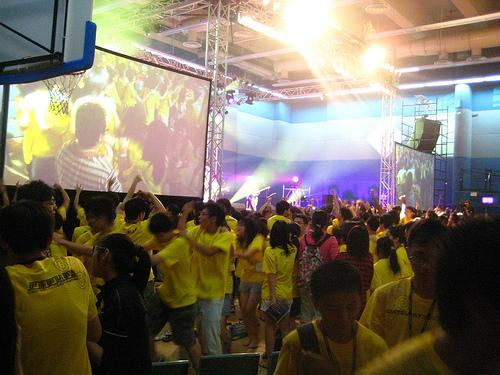

In [117]:
image_path= show_image_with_captions(df)

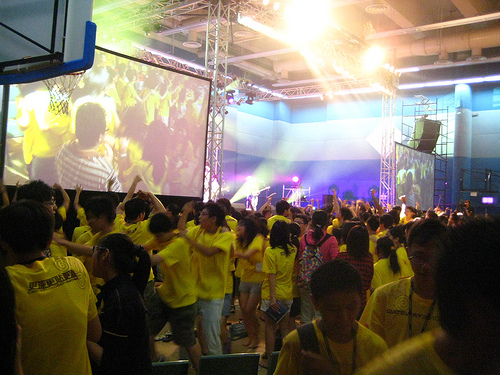


Generated caption: a band is playing on stage with a crowd watching .


In [118]:
generate_caption_for_image(image_path, loaded_model)